In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sn
from sklearn.decomposition import PCA

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("C:/Users/yosim/Desktop/2024-2/AI_2024-2/09-10/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [43]:
features = df.drop(columns=['Outcome'])
target = df['Outcome']
features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [9]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
col_name = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction', 'Age']
df_scaled = pd.DataFrame(features_scaled, columns = col_name)
df_scaled

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [12]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_scaled)
print(principal_components)

[[ 1.06850273  1.23489499]
 [-1.12168331 -0.73385167]
 [-0.39647671  1.59587594]
 ...
 [-0.28347525  0.09706503]
 [-1.06032431  0.83706234]
 [-0.83989172 -1.15175485]]


In [13]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819
...,...,...
763,1.562085,1.923150
764,-0.100405,-0.614181
765,-0.283475,0.097065
766,-1.060324,0.837062


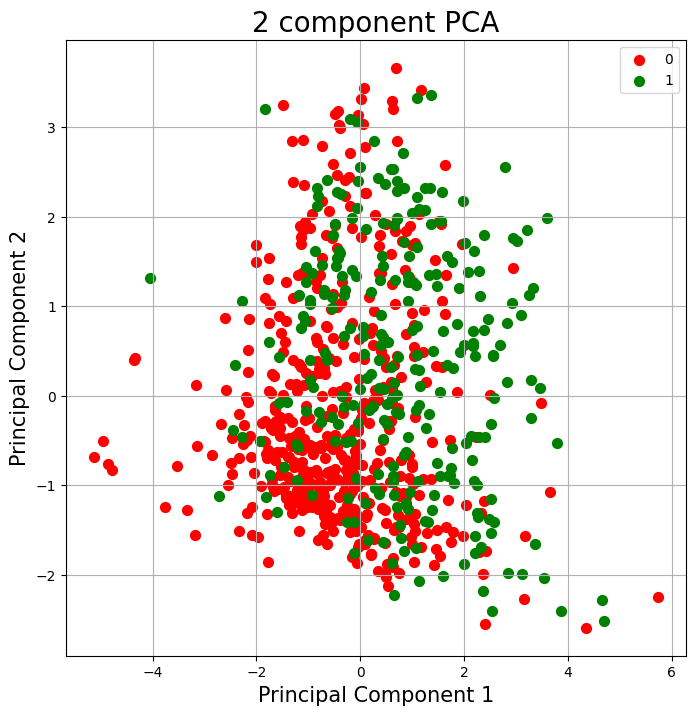

In [25]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)
Outcome = [0, 1]
colors = ['r', 'g']
finalDf = pd.concat([pca_df, df[['Outcome']]], axis = 1)
finalDf
for target, color in zip(Outcome,colors):
    indicesToKeep = finalDf['Outcome'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(Outcome)
ax.grid()

[0.26179749 0.21640127 0.12870373 0.10944113 0.09529305 0.08532855
 0.05247702 0.05055776]


Text(0, 0.5, 'Explained %')

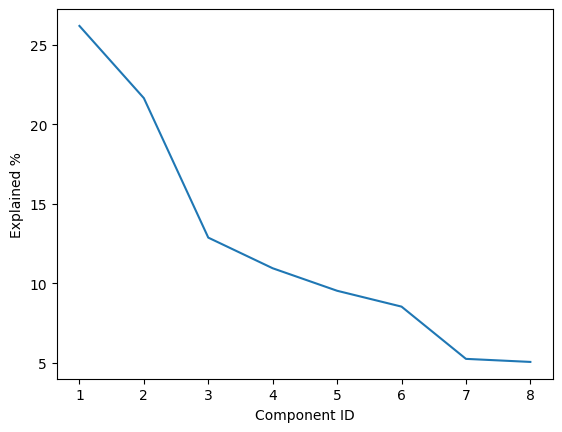

In [36]:
pca_all = PCA(n_components=8)
pca_all.fit(features_scaled)
print(pca_all.explained_variance_ratio_)
# 각 컴포넌트의 설명률 (PC1, PC2, ... 순서대로 계속 작아지는 게 정상)
# PC3 이후로는 설명률이 10% 미만이다.
plt.plot(np.arange(1, 9), pca_all.explained_variance_ratio_ * 100)
plt.xlabel("Component ID")
plt.ylabel("Explained %")

[ 26.17974932  47.81987607  60.69024944  71.63436249  81.16366731
  89.69652215  94.9442244  100.        ]


Text(0, 0.5, 'Explained %')

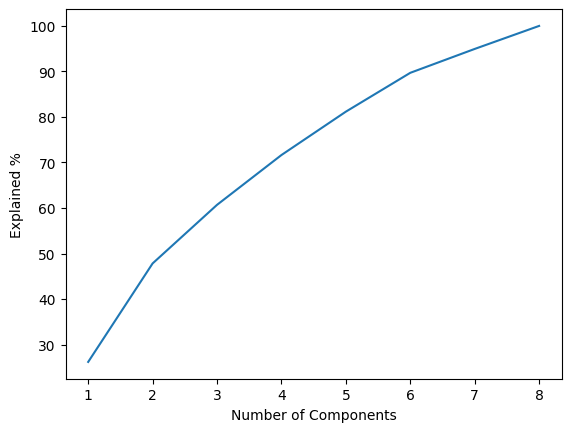

In [38]:
plt.plot(np.arange(1, 9), np.cumsum(pca_all.explained_variance_ratio_) * 100)
print(np.cumsum(pca_all.explained_variance_ratio_) * 100)
plt.xlabel("Number of Components")
plt.ylabel("Explained %")

# 결과 분석
- 2개 일 경우 처참함
- 그나마 PCA의 효과를 보려면 6개일 경우가 89%로 가장 좋아보임
- ML은 LogisticRegression 진행
- DL도 진행

### ML

In [44]:
pca = PCA(n_components=6)
principal_components = pca.fit_transform(features_scaled)
target = df['Outcome'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(principal_components, target, test_size=0.2, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [51]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.7727272727272727
[[83 16]
 [19 36]]


### DL

In [52]:
Y = pd.get_dummies(target).values

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(principal_components,Y,test_size=0.2,random_state=0) 

In [57]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(6,),activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(4,activation='tanh'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 56        
                                                                 
 dense_5 (Dense)             (None, 6)                 54        
                                                                 
 dense_6 (Dense)             (None, 4)                 28        
                                                                 
 dense_7 (Dense)             (None, 2)                 10        
                                                                 
Total params: 148 (592.00 Byte)
Trainable params: 148 (592.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
model_history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30



20/20 [==============================] - 2s 25ms/step - loss: 0.6978 - accuracy: 0.6401 - val_loss: 0.6263 - val_accuracy: 0.6429
Epoch 2/30
20/20 [==============================] - 0s 7ms/step - loss: 0.6383 - accuracy: 0.6629 - val_loss: 0.5738 - val_accuracy: 0.7013
Epoch 3/30
20/20 [==============================] - 0s 6ms/step - loss: 0.5999 - accuracy: 0.6971 - val_loss: 0.5360 - val_accuracy: 0.7208
Epoch 4/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5724 - accuracy: 0.7280 - val_loss: 0.5084 - val_accuracy: 0.7273
Epoch 5/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5527 - accuracy: 0.7264 - val_loss: 0.4898 - val_accuracy: 0.7403
Epoch 6/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5382 - accuracy: 0.7362 - val_loss: 0.4742 - val_accuracy: 0.7273
Epoch 7/30
20/20 [==============================] - 0s 5ms/step - loss: 0.5281 - accuracy: 0.7362 - val_loss: 0.4626 - val_accuracy: 0.7468
Epoch 8/30
20/20 [============

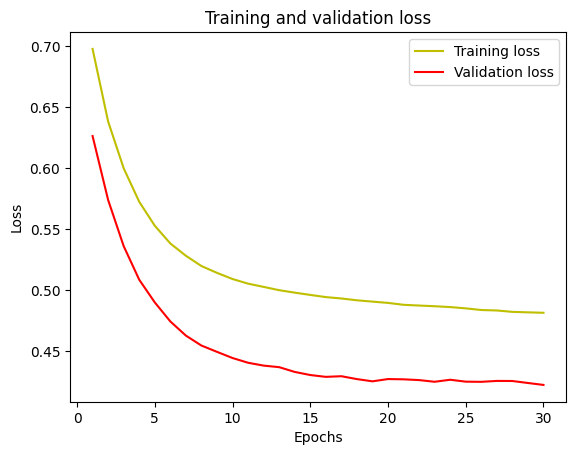

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

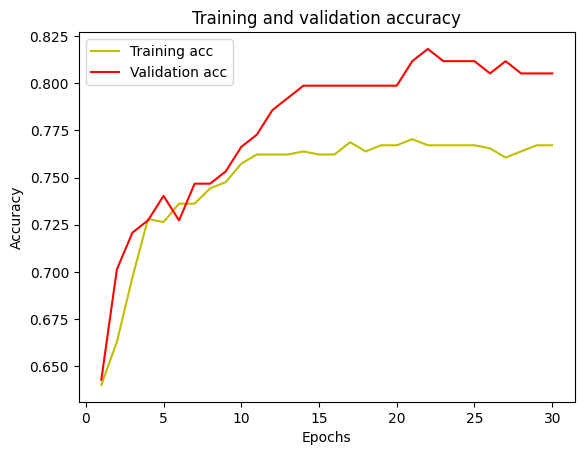

In [60]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       107
           1       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154

[[94 13]
 [17 30]]


# 결과

- ML의 경우 성능 변화가 별로 없지만 DL의 경우 accuracy가 12% 증가하였다.